In [3]:
import pandas as pd
#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [4]:
ford_csv = "ford_revenue.csv"
gm_csv = "gm_revenue.csv"
honda_csv = "honda_revenue.csv"
toyota_csv = "toyota_revenue.csv"

In [6]:
ford_df = pd.read_csv(ford_csv)
gm_df = pd.read_csv(gm_csv)
honda_df = pd.read_csv(honda_csv)
toyota_df = pd.read_csv(toyota_csv)

In [4]:
ford_df.head()

,Ford Total Revenue,Dates,Last Price
0,0,2018-09-30,37666000000
1,1,2018-06-30,38920000000
2,2,2018-03-31,41959000000
3,3,2017-12-31,41326000000


In [7]:
# Merge the four DataFrames together based on the Dates they share
revenue_df1 = pd.merge(ford_df, gm_df, on="Dates")
revenue_df1.head()

,Ford Total Revenue,Dates,Last Price_x,GM Total Revenue,Last Price_y
0,1,2018-06-30,38920000000,0,36760000000
1,2,2018-03-31,41959000000,1,36099000000
2,3,2017-12-31,41326000000,2,37715000000


In [6]:
revenue_df1.columns
revenue_df1.dtypes

Ford Total Revenue     int64
Dates                 object
Last Price_x           int64
GM Total Revenue       int64
Last Price_y           int64
dtype: object

In [9]:
items_pd = pd.DataFrame(revenue_df1, columns=[
                        "Dates", "Last Price_x", "Last Price_y"])
items_pd

,Dates,Last Price_x,Last Price_y
0,2018-06-30,38920000000,36760000000
1,2018-03-31,41959000000,36099000000
2,2017-12-31,41326000000,37715000000


In [10]:
# Rename columns so that they are differentiated
revenue_df1_temp = items_pd.rename(columns={"Dates": "Dates", "Last Price_x": "Ford total revenue", "Last Price_y": "GM total revenue"})
revenue_df1_temp.head()

,Dates,Ford total revenue,GM total revenue
0,2018-06-30,38920000000,36760000000
1,2018-03-31,41959000000,36099000000
2,2017-12-31,41326000000,37715000000


In [11]:
revenue_df2 = pd.merge(revenue_df1_temp, honda_df, on="Dates")
revenue_df2.head()

,Dates,Ford total revenue,GM total revenue,Honda Total Revenue,Last Price
0,2018-06-30,38920000000,36760000000,0,36337920990
1,2018-03-31,41959000000,36099000000,1,36833675752
2,2017-12-31,41326000000,37715000000,2,35119466625


In [12]:
items_pd_2 = pd.DataFrame(revenue_df2, columns=[
                        "Dates", "Ford total revenue", "GM total revenue", "Last Price"])
items_pd_2.head()

,Dates,Ford total revenue,GM total revenue,Last Price
0,2018-06-30,38920000000,36760000000,36337920990
1,2018-03-31,41959000000,36099000000,36833675752
2,2017-12-31,41326000000,37715000000,35119466625


In [16]:
# Rename columns so that they are differentiated
revenue_df2_temp = items_pd_2.rename(columns={"Last Price": "Honda total revenue"})
revenue_df2_temp.head()

,Dates,Ford total revenue,GM total revenue,Honda total revenue
0,2018-06-30,38920000000,36760000000,36337920990
1,2018-03-31,41959000000,36099000000,36833675752
2,2017-12-31,41326000000,37715000000,35119466625


In [17]:
revenue_df3 = pd.merge(revenue_df2_temp, toyota_df, on="Dates")
revenue_df3.head()

,Dates,Ford total revenue,GM total revenue,Honda total revenue,Toyota Total Revenue,Last Price
0,2018-06-30,38920000000,36760000000,36337920990,0,66485478990
1,2018-03-31,41959000000,36099000000,36833675752,1,71344081224
2,2017-12-31,41326000000,37715000000,35119466625,2,67501182125


In [18]:
items_pd_3 = pd.DataFrame(revenue_df3, columns=[
                        "Dates", "Ford total revenue", "GM total revenue", "Honda total revenue", "Last Price"])
items_pd_3.head()

,Dates,Ford total revenue,GM total revenue,Honda total revenue,Last Price
0,2018-06-30,38920000000,36760000000,36337920990,66485478990
1,2018-03-31,41959000000,36099000000,36833675752,71344081224
2,2017-12-31,41326000000,37715000000,35119466625,67501182125


In [19]:
# Rename columns so that they are differentiated
revenue_df3_temp = items_pd_3.rename(columns={"Last Price": "Toyota total revenue"})
revenue_df3_temp.head()

,Dates,Ford total revenue,GM total revenue,Honda total revenue,Toyota total revenue
0,2018-06-30,38920000000,36760000000,36337920990,66485478990
1,2018-03-31,41959000000,36099000000,36833675752,71344081224
2,2017-12-31,41326000000,37715000000,35119466625,67501182125


In [20]:
new_date = []
for dates in revenue_df3_temp['Dates']:
    s = dt.datetime.strptime(dates, '%Y-%m-%d')
    new_date.append(s)
print(new_date)

[datetime.datetime(2018, 6, 30, 0, 0), datetime.datetime(2018, 3, 31, 0, 0), datetime.datetime(2017, 12, 31, 0, 0)]


In [16]:
se = pd.Series(new_date)

revenue_df3_temp['New Date'] = se.values

revenue_df3_temp.head()

,Dates,Ford total revenue,GM total revenue,Honda total revenue,Toyota total revenue,New Date
0,2018-06-30,38920000000,36760000000,36337920990,66485478990,2018-06-30
1,2018-03-31,41959000000,36099000000,36833675752,71344081224,2018-03-31
2,2017-12-31,41326000000,37715000000,35119466625,67501182125,2017-12-31


<IPython.core.display.Javascript object>


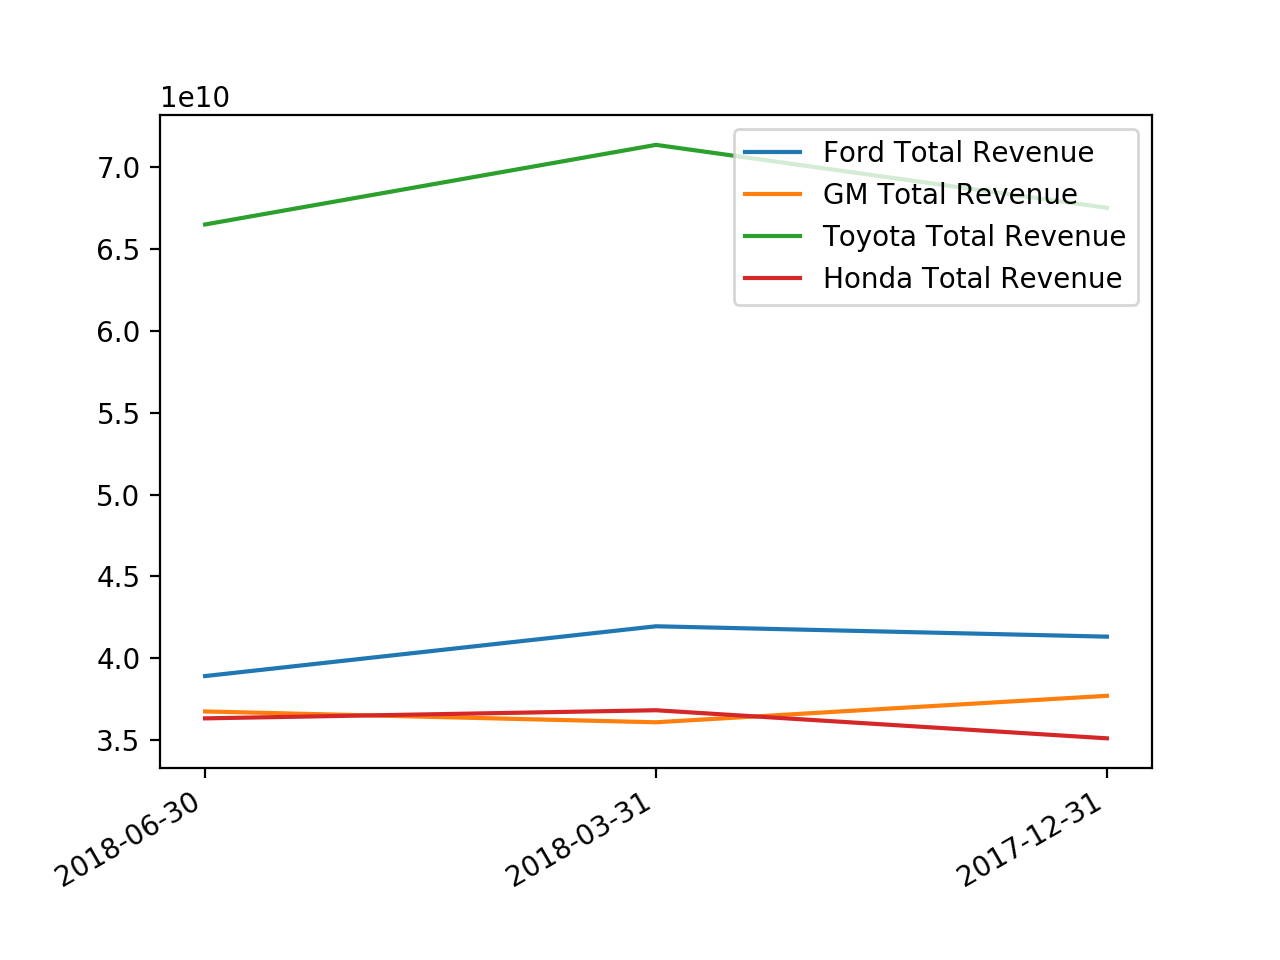

In [21]:
#fig, ax = plt.subplots()
fig, ax1 = plt.subplots()
#fig, ax2 = plt.subplots()
ax1.plot(revenue_df3_temp['Dates'], revenue_df3_temp['Ford total revenue'], label="Ford Total Revenue")
ax1.legend(loc="upper right")
ax1.plot(revenue_df3_temp['Dates'], revenue_df3_temp['GM total revenue'],label="GM Total Revenue")
ax1.legend(loc="upper right")
ax1.plot(revenue_df3_temp['Dates'], revenue_df3_temp['Toyota total revenue'],label="Toyota Total Revenue")
ax1.legend(loc="upper right")
ax1.plot(revenue_df3_temp['Dates'], revenue_df3_temp['Honda total revenue'],label="Honda Total Revenue")
ax1.legend(loc="upper right")


#toyota = ax.plot(revenue_df3_temp['Dates'], revenue_df3_temp['Toyota total revenue'])
#honda = ax.plot(revenue_df3_temp['Dates'], revenue_df3_temp['Honda total revenue'])
# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# use a more precise date string for the x axis locations in the
# toolbar
#ax.fmt_xdata = revenue_df3_temp['Dates'].DateFormatter('%Y-%m-%d')

#ax.set_title('fig.autofmt_xdate fixes the labels')

In [22]:
wti_csv = "WTI_Crude_Oil.csv"
wti_df = pd.read_csv(wti_csv)

new_date = []
for dates in wti_df['Dates']:
    s = dt.datetime.strptime(dates, '%Y-%m-%d')
    new_date.append(s)
#print(new_date)

se = pd.Series(new_date)

wti_df['New Date'] = se.values

wti_df.head()

,WTI Crude Oil,Dates,Last Price,New Date
0,0,2018-10-31,64.86,2018-10-31
1,1,2018-10-30,66.35,2018-10-30
2,2,2018-10-29,66.69,2018-10-29
3,3,2018-10-26,67.62,2018-10-26
4,4,2018-10-25,66.97,2018-10-25


In [52]:
start_date = '2018-06-29'
start_date_1 = '2018-03-29'
start_date_2 = '2017-12-29'

mask = (wti_df['Dates'] == start_date)
mask_1 =(wti_df['Dates'] == start_date_1)
mask_2 = (wti_df['Dates'] == start_date_2)
wti_df.loc[mask]
wti_df.loc[mask_1]
wti_df.loc[mask_2]

df = wti_df.loc[mask]
df_1 = wti_df.loc[mask_1]
df_2 = wti_df.loc[mask_2]

frames = [df, df_1, df_2]
wti_df1 = pd.concat(frames)
wti_df1.reset_index()


,index,WTI Crude Oil,Dates,Last Price,New Date
0,86,86,2018-06-29,74.29,2018-06-29
1,150,150,2018-03-29,64.91,2018-03-29
2,211,211,2017-12-29,60.10,2017-12-29


<IPython.core.display.Javascript object>


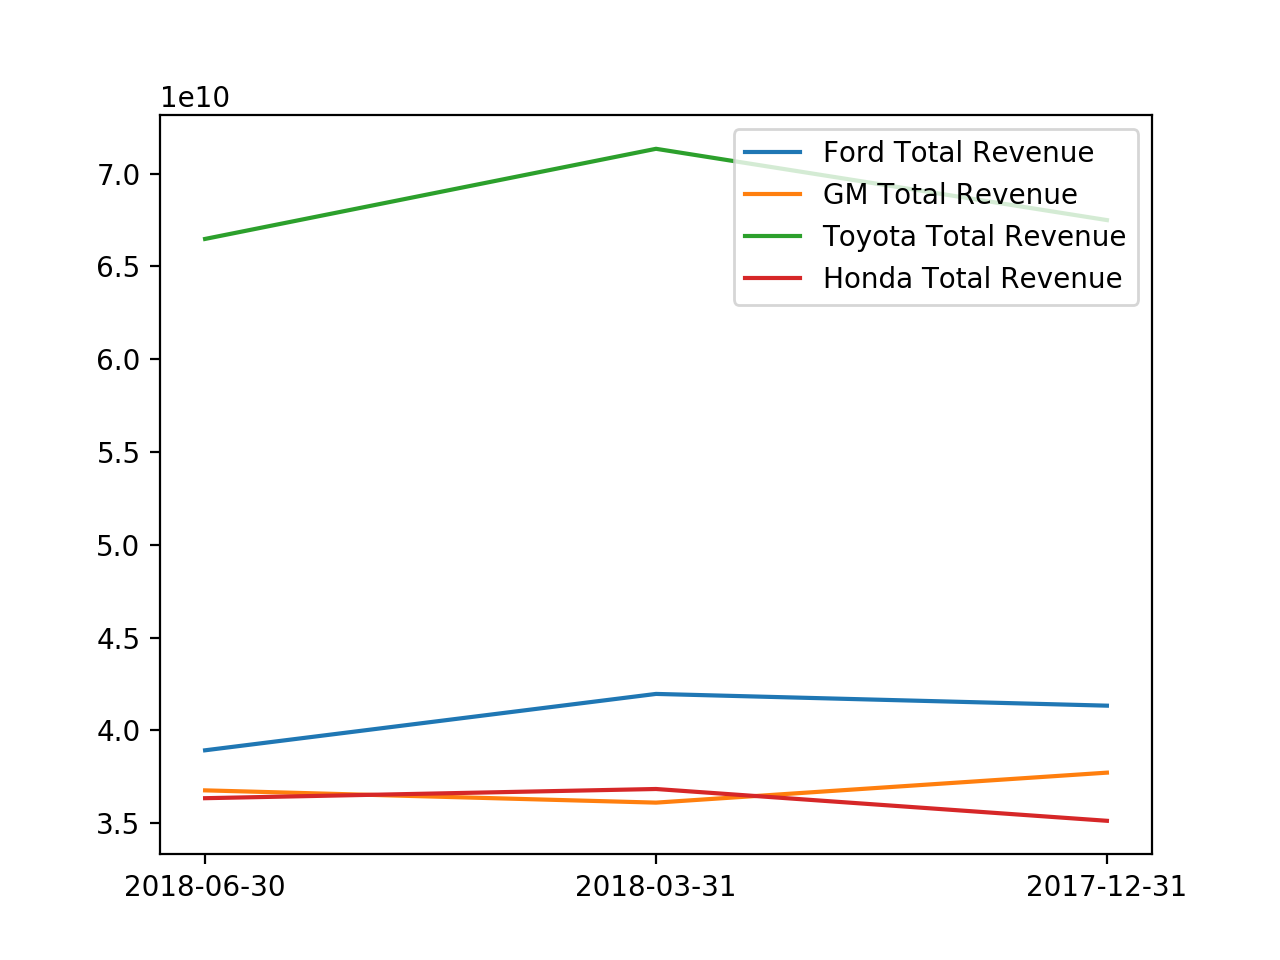

ValueError: x and y must have same first dimension, but have shapes (3,) and (8944,)

In [53]:
#fig, ax = plt.subplots()
fig, ax1 = plt.subplots()
#fig, ax2 = plt.subplots()
ax1.plot(revenue_df3_temp['Dates'], revenue_df3_temp['Ford total revenue'], label="Ford Total Revenue")
ax1.legend(loc="upper right")
ax1.plot(revenue_df3_temp['Dates'], revenue_df3_temp['GM total revenue'],label="GM Total Revenue")
ax1.legend(loc="upper right")
ax1.plot(revenue_df3_temp['Dates'], revenue_df3_temp['Toyota total revenue'],label="Toyota Total Revenue")
ax1.legend(loc="upper right")
ax1.plot(revenue_df3_temp['Dates'], revenue_df3_temp['Honda total revenue'],label="Honda Total Revenue")
ax1.legend(loc="upper right")
ax1.plot(wti_df1['Dates'], wti_df['Last Price'], label= "Crude Oil Last Price")